# Ejercicio de programación Regresión Lineal

In [213]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = np.loadtxt('/content/drive/MyDrive/datasets/MisDatasets/placement.csv', delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # m = numero de ejemplos de entrenamiento

In [216]:
print(X)

[6.89 5.12 7.82 7.42 6.94 7.89 6.73 6.75 6.09 8.31 5.32 6.61 8.94 6.93
 7.73 7.25 6.84 5.38 6.94 7.48 7.28 6.85 6.14 6.19 6.53 7.28 8.31 5.42
 5.94 7.15 7.36 8.1  6.96 6.35 7.34 6.87 5.99 5.9  8.62 7.43 9.38 6.89
 5.95 7.66 5.09 7.87 6.07 5.84 8.63 8.87 9.58 9.26 8.37 6.47 6.86 8.2
 5.84 6.6  6.92 7.56 5.61 5.48 6.34 9.16 7.36 7.6  5.11 6.51 7.56 7.3
 5.79 7.47 7.78 8.44 6.85 6.97 6.94 8.99 6.59 7.18 7.63 6.1  5.58 8.44
 4.26 4.79 7.61 8.09 4.73 6.42 7.11 6.22 7.9  6.79 5.83 6.63 7.11 5.98
 7.69 6.61 7.95 6.71 5.13 7.05 7.62 6.66 6.13 6.33 7.76 7.77 8.18 5.42
 8.58 6.94 5.84 8.35 9.04 7.12 7.4  7.39 5.23 6.5  5.12 5.1  6.06 7.33
 5.91 6.78 7.93 7.29 6.68 6.37 5.84 6.05 7.2  6.1  5.64 7.14 7.91 7.19
 7.91 6.76 6.93 4.85 6.17 5.84 6.07 5.66 7.57 8.28 6.3  6.12 7.37 7.94
 7.08 6.98 7.38 6.47 5.95 8.71 7.13 7.3  5.53 8.93 9.06 8.21 8.6  8.13
 8.65 9.31 6.22 8.01 6.93 6.75 7.32 7.04 6.29 7.09 8.15 7.14 6.19 8.22
 5.88 7.28 7.88 6.31 7.84 6.26 7.35 8.11 6.19 7.28 8.25 4.57 7.89 6.93
 5.89 7.

In [217]:
print(y)

[3.26 1.98 3.25 3.67 3.57 2.99 2.6  2.48 2.31 3.51 1.86 2.6  3.65 2.89
 3.42 3.23 2.35 2.09 2.98 2.83 3.16 2.93 2.3  2.48 2.71 3.65 3.42 2.16
 2.24 3.49 3.26 3.89 3.08 2.73 3.42 2.87 2.84 2.43 4.36 3.33 4.02 2.7
 2.54 2.76 1.86 3.58 2.26 3.26 4.09 4.62 4.43 3.79 4.11 2.61 3.09 3.39
 2.74 1.94 3.09 3.31 2.19 1.61 2.09 4.25 2.92 3.81 1.63 2.89 2.99 2.94
 2.35 3.34 3.62 4.03 3.44 3.28 3.15 4.6  2.21 3.   3.44 2.2  2.17 3.49
 1.53 1.48 2.77 3.55 1.48 2.72 2.66 2.14 4.   3.08 2.42 2.79 2.61 2.84
 3.83 3.24 4.14 3.52 1.37 3.   3.74 2.82 2.19 2.59 3.54 4.06 3.76 2.25
 4.1  2.37 1.87 4.21 3.33 2.99 2.88 2.65 1.73 3.02 2.01 2.3  2.31 3.16
 2.6  3.11 3.34 3.12 2.49 2.01 2.48 2.58 2.83 2.6  2.1  3.13 3.89 2.4
 3.15 3.18 3.04 1.54 2.42 2.18 2.46 2.21 3.4  3.67 2.73 2.76 3.08 3.99
 2.85 3.09 3.13 2.7  3.04 4.08 2.93 3.33 2.55 3.91 3.82 4.08 3.98 3.6
 3.52 4.37 2.87 3.76 2.51 2.56 2.99 3.5  3.23 3.64 3.63 3.03 2.72 3.89
 2.08 2.72 3.14 3.18 3.47 2.44 3.08 4.06 2.69 3.48 3.75 1.94 3.67 2.46
 2.57 3.2

In [218]:
print(X.size)

200


### 1.1 Trazar los datos

In [219]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Sistema de Gestión de Población Asegurada')
    pyplot.xlabel('Paquetes')


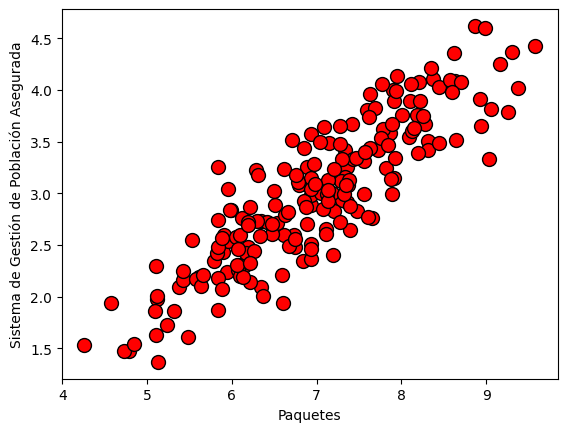

In [220]:
plotData(X, y)

In [221]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [222]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [223]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [224]:
J = computeCost(X, y, theta=np.array([0.45, 1.5]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-0.687, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 32.07
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 54.24
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [225]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [226]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 10500
alpha = 0.039

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: -0.9856, 0.5696
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

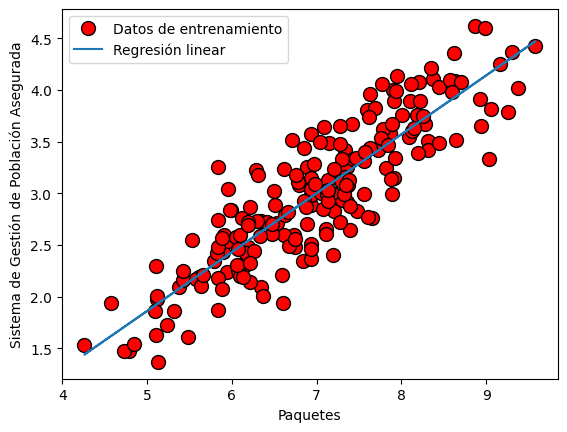

In [227]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [228]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 10079.49

Para una población de = 70,000, se predice un beneficio de 41406.15



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

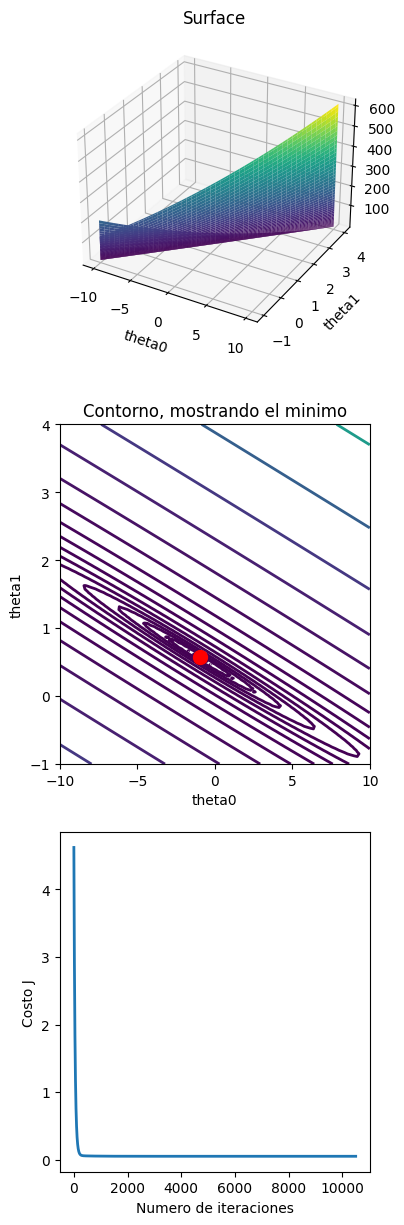

In [229]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('CGPA v/s Package (in LPA)')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass